# 3-Layer Neural Network for Non-linear Regression (TensorFlow High-Level API)

This notebook implements a 3-layer neural network using TensorFlow's high-level API with a fully-managed training approach. We'll use Keras as the high-level API, which provides a very concise and user-friendly interface for building and training neural networks.

We'll continue to use the same 3-variable non-linear function for our synthetic dataset to maintain consistency across implementations.

In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the function to generate synthetic data
def true_function(X):
    """
    Non-linear function with 3 variables
    X should be a matrix with 3 columns
    """
    return 2 * tf.math.sin(X[:, 0]) + 3 * tf.math.cos(X[:, 1]) + 0.5 * X[:, 2]**2 + 0.1 * X[:, 0] * X[:, 1] * X[:, 2]

# Generate synthetic dataset
def generate_data(n_samples=1000):
    # Generate random inputs
    X = tf.cast(tf.random.uniform((n_samples, 3), -2, 2), tf.float32)

    # Calculate true output values
    y_true = true_function(X)

    # Add some noise
    y = y_true + tf.random.normal((n_samples,), 0, 0.5)

    return X, tf.reshape(y, (-1, 1))

# Generate training data
X_train, y_train = generate_data(1000)

# Generate test data
X_test, y_test = generate_data(200)

print(f"Training data shape: X = {X_train.shape}, y = {y_train.shape}")
print(f"Test data shape: X = {X_test.shape}, y = {y_test.shape}")

Training data shape: X = (1000, 3), y = (1000, 1)
Test data shape: X = (200, 3), y = (200, 1)


## Neural Network Implementation with TensorFlow High-Level API

Now we'll implement our 3-layer neural network using TensorFlow's high-level Keras API. This approach offers the highest level of abstraction and simplicity.

In [2]:
# Create model using the high-level Keras API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,),
                         kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(5, activation='relu',
                         kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(1, activation=None,
                         kernel_initializer=tf.keras.initializers.HeNormal())
])

# Display model summary
model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='mse',  # Mean Squared Error
    metrics=['mae']  # Mean Absolute Error as additional metric
)

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=20,
        min_lr=0.0001
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=1
    )
]

# Train the model with simple fit method
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=3000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=callbacks,
    verbose=1
)
end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 10.3664 - mae: 2.6514 - val_loss: 5.7880 - val_mae: 1.9266 - learning_rate: 0.0050
Epoch 2/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.5641 - mae: 1.7366 - val_loss: 3.4677 - val_mae: 1.4983 - learning_rate: 0.0050
Epoch 3/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0482 - mae: 1.4029 - val_loss: 2.7894 - val_mae: 1.3910 - learning_rate: 0.0050
Epoch 4/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6024 - mae: 1.3030 - val_loss: 2.4985 - val_mae: 1.3333 - learning_rate: 0.0050
Epoch 5/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3457 - mae: 1.2561 - val_loss: 2.3374 - val_mae: 1.2905 - learning_rate: 0.0050
Epoch 6/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1972 - mae: 1.2277 - val_loss: 2.2132 - val_mae: 1.2528 - learning_rate: 0.0050
Epoch 7/3000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.0909 - mae: 1.1981 - val_loss: 2.1066 - val_mae: 1.2192 - learning_rate: 0.005

## Model Evaluation and Visualization

Now let's evaluate our TensorFlow high-level API model and visualize the training progress and predictions.

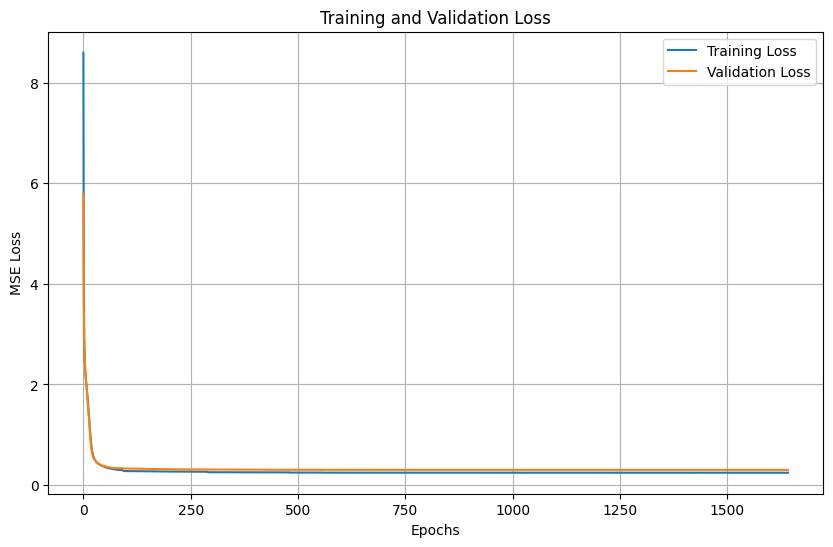

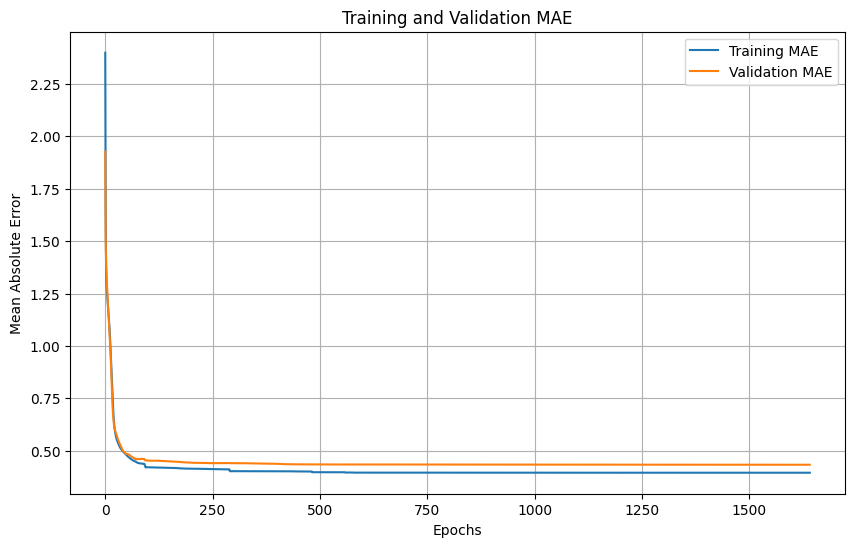

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2660 - mae: 0.4070
Test Loss (MSE): 0.301069
Test MAE: 0.433266
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


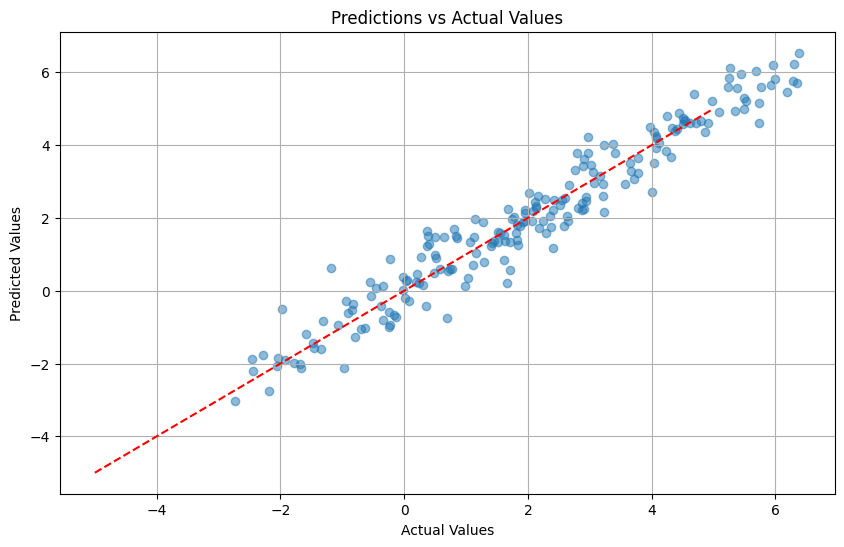

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


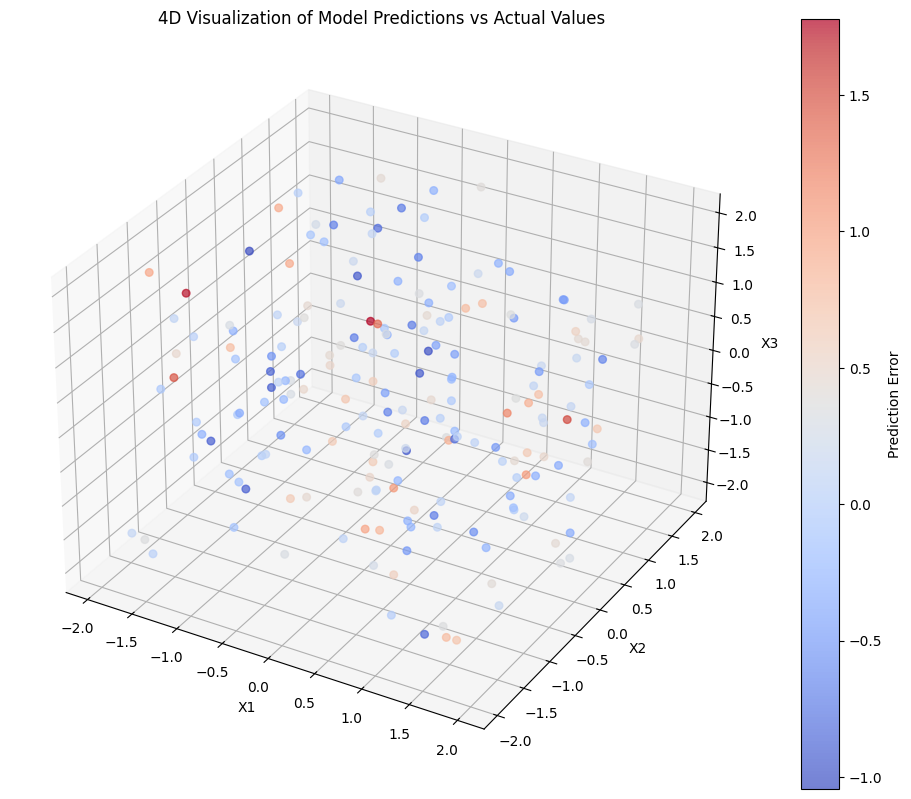

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


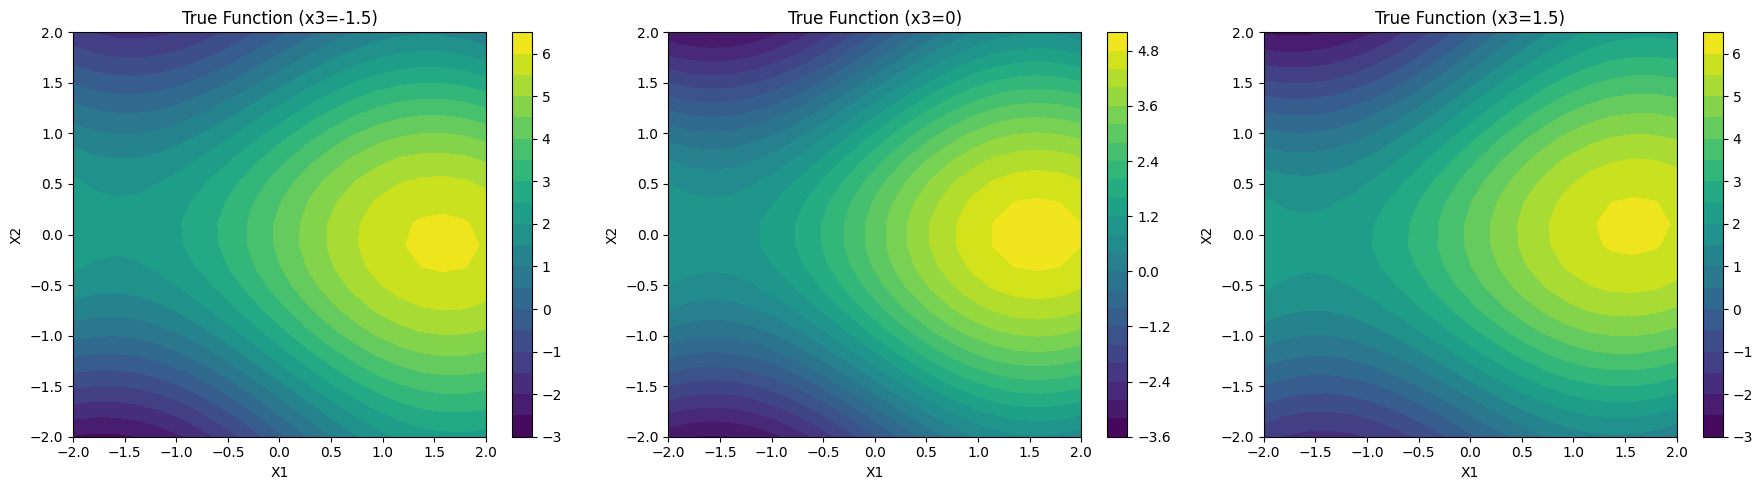

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


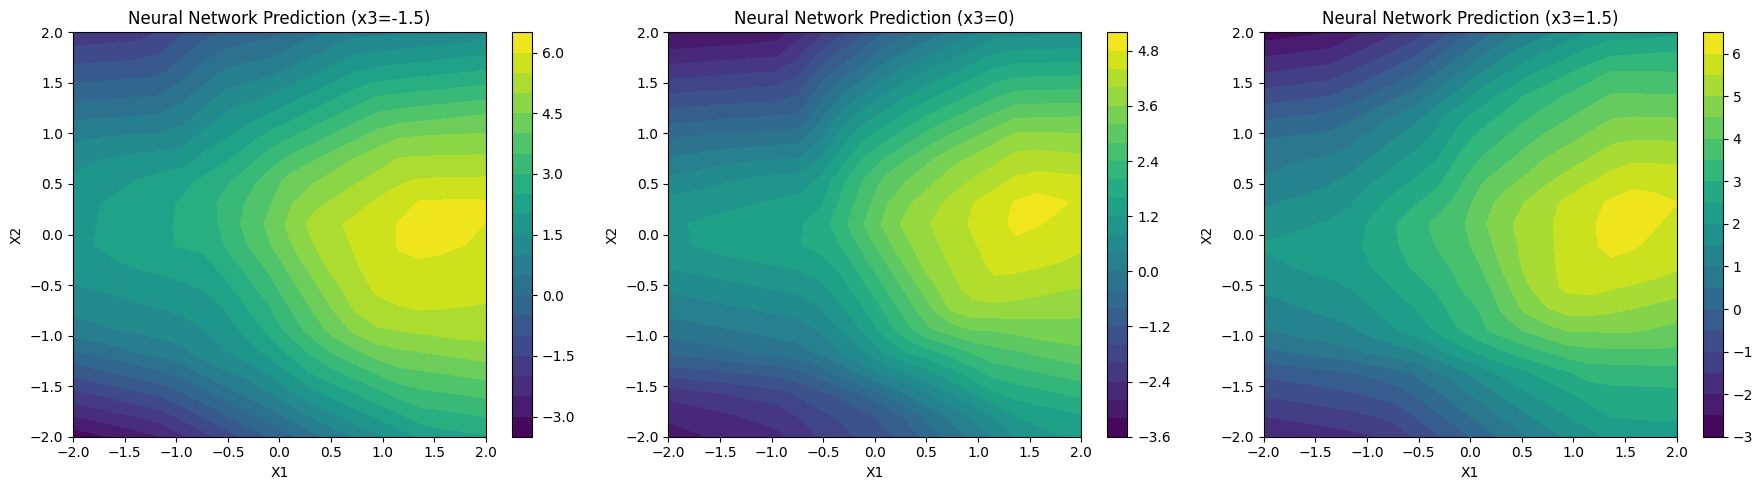

In [3]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE metric
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_results[0]:.6f}")
print(f"Test MAE: {test_results[1]:.6f}")

# Get predictions
y_pred_test = model.predict(X_test)

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.numpy(), y_pred_test, alpha=0.5)
plt.plot([-5, 5], [-5, 5], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.grid(True)
plt.show()

# Create a 4D visualization (3D plot with color as the 4th dimension)
def visualize_4d(X, y_true, y_pred, title):
    # Convert tensors to numpy
    X_np = X.numpy()
    y_true_np = y_true.numpy().flatten()
    y_pred_np = y_pred.flatten()

    # Create a 3D scatter plot with color as the 4th dimension
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Calculate prediction error for coloring
    error = y_true_np - y_pred_np

    # Create the scatter plot
    scatter = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2],
                          c=error,  # Use error for coloring
                          cmap=cm.coolwarm,
                          marker='o',
                          alpha=0.7,
                          s=30)

    # Add a color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Prediction Error')

    # Set labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title(title)

    # Show the plot
    plt.show()

# Generate sample data points for visualization
X_vis, y_vis = generate_data(200)

# Get predictions for visualization
y_vis_pred = model.predict(X_vis)

# Create 4D visualization
visualize_4d(X_vis, y_vis, y_vis_pred, '4D Visualization of Model Predictions vs Actual Values')

# Generate and plot 2D slices
def plot_2d_slices(X_range=2.0, grid_points=20):
    # Create a grid of points for visualization
    x1 = np.linspace(-X_range, X_range, grid_points)
    x2 = np.linspace(-X_range, X_range, grid_points)
    x3_values = [-1.5, 0, 1.5]  # Three fixed values for x3

    fig, axes = plt.subplots(1, len(x3_values), figsize=(18, 5))

    for i, x3 in enumerate(x3_values):
        # Create meshgrid for x1 and x2
        X1, X2 = np.meshgrid(x1, x2)

        # Create input data with fixed x3
        X_input_np = np.zeros((grid_points*grid_points, 3))
        X_input_np[:, 0] = X1.flatten()
        X_input_np[:, 1] = X2.flatten()
        X_input_np[:, 2] = x3

        # Convert to tensor
        X_input = tf.convert_to_tensor(X_input_np, dtype=tf.float32)

        # Get true values and predictions
        y_true = true_function(X_input).numpy().reshape(grid_points, grid_points)
        y_pred = model.predict(X_input).reshape(grid_points, grid_points)

        # Plot the true function
        im1 = axes[i].contourf(X1, X2, y_true, cmap='viridis', levels=20)
        axes[i].set_title(f'True Function (x3={x3})')
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

        # Add a colorbar
        plt.colorbar(im1, ax=axes[i])

    plt.tight_layout()
    plt.show()

    # Now plot the predicted function
    fig, axes = plt.subplots(1, len(x3_values), figsize=(18, 5))

    for i, x3 in enumerate(x3_values):
        # Create meshgrid for x1 and x2
        X1, X2 = np.meshgrid(x1, x2)

        # Create input data with fixed x3
        X_input_np = np.zeros((grid_points*grid_points, 3))
        X_input_np[:, 0] = X1.flatten()
        X_input_np[:, 1] = X2.flatten()
        X_input_np[:, 2] = x3

        # Convert to tensor
        X_input = tf.convert_to_tensor(X_input_np, dtype=tf.float32)

        # Get true values and predictions
        y_true = true_function(X_input).numpy().reshape(grid_points, grid_points)
        y_pred = model.predict(X_input).reshape(grid_points, grid_points)

        # Plot the predicted function
        im2 = axes[i].contourf(X1, X2, y_pred, cmap='viridis', levels=20)
        axes[i].set_title(f'Neural Network Prediction (x3={x3})')
        axes[i].set_xlabel('X1')
        axes[i].set_ylabel('X2')

        # Add a colorbar
        plt.colorbar(im2, ax=axes[i])

    plt.tight_layout()
    plt.show()

# Generate and plot 2D slices
plot_2d_slices(X_range=2.0, grid_points=20)

## Summary

In this notebook, we've implemented a 3-layer neural network using TensorFlow's high-level Keras API. Key features of this implementation:

1. **Extremely concise code** - Keras Sequential API allows us to define the model in just a few lines
2. **Simple training** - The `fit` method handles all training loop logic
3. **Built-in callbacks** - For early stopping, learning rate adjustment, and TensorBoard logging
4. **Maximum abstraction** - Hides almost all implementation details for rapid development

This is the highest-level API in TensorFlow and is ideal for:
- Rapid prototyping
- Standard model architectures
- Production deployment with minimal code
- Beginners learning deep learning

The model successfully learned to approximate our non-linear 3-variable function, with performance comparable to the more complex implementations. This demonstrates that for many standard tasks, the high-level API provides excellent results with minimal effort.

This implementation completes the series of approaches we've explored, ranging from the most low-level (NumPy from scratch) to the most high-level (TensorFlow Keras API).